# Inferential Statistics Ib - Frequentism

## Learning objectives

Welcome to the second Frequentist inference mini-project! Over the course of working on this mini-project and the previous frequentist mini-project, you'll learn the fundamental concepts associated with frequentist inference. The following list includes the topics you will become familiar with as you work through these two mini-projects:
* the _z_-statistic
* the _t_-statistic
* the difference and relationship between the two
* the Central Limit Theorem, its assumptions and consequences
* how to estimate the population mean and standard deviation from a sample
* the concept of a sampling distribution of a test statistic, particularly for the mean
* how to combine these concepts to calculate confidence intervals and p-values
* how those confidence intervals and p-values allow you to perform hypothesis (or A/B) tests

## Prerequisites

* what a random variable is
* what a probability density function (pdf) is
* what the cumulative density function is
* a high-level sense of what the Normal distribution

If these concepts are new to you, please take a few moments to Google these topics in order to get a sense of what they are and how you might use them.

These two notebooks were designed to bridge the gap between having a basic understanding of probability and random variables and being able to apply these concepts in Python. This second frequentist inference mini-project focuses on a real-world application of this type of inference to give you further practice using these concepts. 

In the previous notebook, we used only data from a known normal distribution. You'll now tackle real data, rather than simulated data, and answer some relevant real-world business problems using the data.

## Hospital medical charges

Imagine that a hospital has hired you as their data analyst. An administrator is working on the hospital's business operations plan and needs you to help them answer some business questions. This mini-project, as well as the bootstrap and Bayesian inference mini-projects also found in this unit are designed to illustrate how each of the inferential statistics methods have their uses for different use cases. In this assignment notebook, you're going to use frequentist statistical inference on a data sample to answer the questions:
* has the hospital's revenue stream fallen below a key threshold?
* are patients with insurance really charged different amounts than those without?
Answering that last question with a frequentist approach makes some assumptions, or requires some knowledge, about the two groups. In the next mini-project, you'll use bootstrapping to test that assumption. And in the final mini-project of the unit, you're going to create a model for simulating _individual_ charges (not a sampling distribution) that the hospital can use to model a range of scenarios.

We are going to use some data on medical charges obtained from [Kaggle](https://www.kaggle.com/easonlai/sample-insurance-claim-prediction-dataset). For the purposes of this exercise, assume the observations are the result of random sampling from our one hospital. Recall in the previous assignment, we introduced the Central Limit Theorem (CLT), and how it tells us that the distributions of sample statistics approach a normal distribution as $n$ increases. The amazing thing about this is that it applies to the sampling distributions of statistics that have been calculated from even highly non-normal distributions of data. Remember, also, that hypothesis testing is very much based on making inferences about such sample statistics. You're going to rely heavily on the CLT to apply frequentist (parametric) tests to answer the questions in this notebook.

In [113]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm 
from scipy.stats import t
from scipy.stats import ttest_ind
from numpy.random import seed
medical = pd.read_csv('../../data/insurance2.csv')

In [114]:
medical.shape

(1338, 8)

In [115]:
medical.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


__Q:__ Plot the histogram of charges and calculate the mean and standard deviation. Comment on the appropriateness of these statistics for the data.

__A:__

In [116]:
np.mean(medical['charges'])

13270.422265141257

In [117]:
np.std(medical['charges'])

12105.484975561605

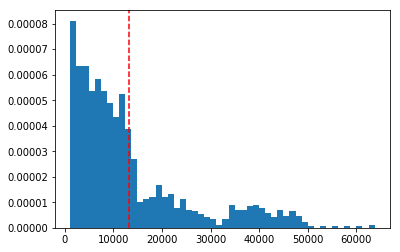

In [118]:
_=plt.hist(medical['charges'],bins=50,density=True,histtype='stepfilled')
plt.axvline(np.mean(medical['charges']),color='r',linestyle='--')

__Q:__ The administrator is concerned that the actual average charge has fallen below 12000, threatening the hospital's operational model. On the assumption that these data represent a random sample of charges, how would you justify that these data allow you to answer that question? And what would be the most appropriate frequentist test, of the ones discussed so far, to apply?

__A:__ 

In [135]:
print('Null hypothesis: mean_charges < 12000')
print('Alternative Hypothesis : mean_charges >= 12000')
print('One sample one tail Z-test would be the most appropriate frequentist test because the sample size(1338) is greater than 30 (as per CLT)\n')

# Mean of random sample
random_sample_mean = np.mean(medical['charges'])
print('Mean of random sample: ' + str(random_sample_mean))

# Std. Dev. of random sample (assumed degrees of freedom = 1) used for estimating pop std. dev.
random_sample_std=np.std(medical['charges'],ddof=1)
print('Standard deviation of random sample: ' + str(random_sample_std))

# Size of random sample
random_sample_size=len(medical['charges'])
print('Random Sample size: ' + str(random_sample_size) +'\n')

# Assuming null hypothesis is true: population mean = null hypothesis mean(12000)
mean= 12000
print('Distribution mean under null hypothesis: '+ str(mean))

# Estimate the std dev. of population
std_dev = random_sample_std/np.sqrt(random_sample_size)
print('Estimated std. dev. from random sample: '+ str(std_dev) +'\n')

# Z test - because the sample size(1338) is greater than 30 (as per CLT)
z_statistic = (random_sample_mean - mean)/std_dev
print('Z-statistic : ' +  str(z_statistic))        

z_table = 0.99994

# P-value
print('Probability(getting 13270.4222 above the 12000 | null hypothesis is true)') 

p_value = 1-0.99
print('P-value: '+ str(p_value))

# Assumed significance level
print('Significance level: '+ str(0.05))

# Result
print('P-value(0.01) < Significance-level(0.05): Reject Null hypothesis')

Null hypothesis: mean_charges < 12000
Alternative Hypothesis : mean_charges >= 12000
One sample one tail Z-test would be the most appropriate frequentist test because the sample size(1338) is greater than 30 (as per CLT)

Mean of random sample: 13270.422265141257
Standard deviation of random sample: 12110.011236693994
Random Sample size: 1338

Distribution mean under null hypothesis: 12000
Estimated std. dev. from random sample: 331.06745431568226

Z-statistic : 3.837351719658534
Probability(getting 13270.4222 above the 12000 | null hypothesis is true)
P-value: 0.010000000000000009
Significance level: 0.05
P-value(0.01) < Significance-level(0.05): Reject Null hypothesis


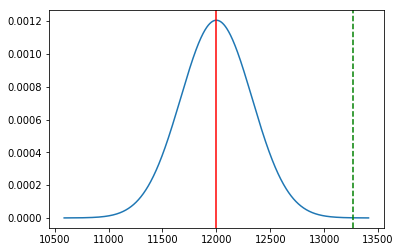

In [120]:
# Plot the PDF
x = np.linspace(norm.ppf(0.00001,loc=mean,scale=std_dev),norm.ppf(0.99999,loc=mean,scale=std_dev),1000)
_ = plt.plot(x,norm.pdf(x,loc=mean,scale=std_dev))
_ = plt.axvline(mean,color='r')
_ = plt.axvline(random_sample_mean,color='g',linestyle='--')

In [121]:
'Fail to reject Null hypothesis'

'Fail to reject Null hypothesis'

__Q:__ Given the nature of the administrator's concern, what is the appropriate confidence interval in this case? A one-sided or two-sided interval? Calculate the critical value and the relevant 95% confidence interval for the mean and comment on whether the administrator should be concerned?

__A:__

A 95% confidence interval would be appropriate, as anything lower than 2 standard error would make the administrator think about the operational model being effected.

One-sided interval as the administrator is only concerned when average falls below 12000

In [122]:
z_statistic

3.837351719658534

In [123]:
one_sided_conf_interval = 12000 - (z_statistic * std_dev)
one_sided_conf_interval

10729.577734858743

Based on the random_sample hypothesis testing, 
the administrator should not be concerned as the 
probability of getting a mean charges less than 12000 is 
very low ~ 0.01% which is below the assumed 
significance level of 0.05%. Test proves a very 
significant evidence that the average has not
fallen below 12000' 

In [124]:
?t

The administrator then wants to know whether people with insurance really are charged a different amount to those without.

__Q:__ State the null and alternative hypothesis here. Use the _t_-test for the difference between means where the pooled standard deviation of the two groups is given by
\begin{equation}
s_p = \sqrt{\frac{(n_0 - 1)s^2_0 + (n_1 - 1)s^2_1}{n_0 + n_1 - 2}}
\end{equation}

and the *t* test statistic is then given by

\begin{equation}
t = \frac{\bar{x}_0 - \bar{x}_1}{s_p \sqrt{1/n_0 + 1/n_1}}.
\end{equation}

What assumption about the variances of the two groups are we making here?

__A:__

In [125]:
'Null Hypothesis: mean_charge_with_insurance - mean_charge_without_insurance = 0' 
'Alternative Hypothesis: mean_charge_with_insurance - mean_charge_without_insurance !=0'

'Alternative Hypothesis: mean_charge_with_insurance - mean_charge_without_insurance !=0'

In [126]:
medical.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


In [127]:
# Random sample: charges with insurance
charges_1=medical[medical['insuranceclaim'] == 1]['charges']

# Mean of first sample
m1=np.mean(charges_1)
print('Mean of first sample: '+ str(m1))

# Standard Deviation of first sample
s1=np.std(charges_1,ddof=1)
print('Standard Deviation of first sample: '+ str(s1))

# Size of first sample
n1=len(charges_1)
print('Size of first sample: '+ str(n1)+'\n')

# Random sample: charges with insurance
charges_0=medical[medical['insuranceclaim'] == 0]['charges']

# Mean of second sample
m0=np.mean(charges_0)
print('Mean of second sample: '+ str(m0))

# Standard Deviation of second sample
s0=np.std(charges_0,ddof=1)
print('Standard Deviation of second sample: '+ str(s0))

# Size of second sample
n0=len(charges_0)
print('Size of second sample: '+ str(n0)+'\n')

# Difference in Mean
m=m1-m0
print('Difference in Mean between two samples: '+ str(m))
print('Assuming the means & variances are equal')

Mean of first sample: 16423.928276537663
Standard Deviation of first sample: 14045.928418802127
Size of first sample: 783

Mean of second sample: 8821.421892306294
Standard Deviation of second sample: 6446.510126811736
Size of second sample: 555

Difference in Mean between two samples: 7602.506384231368
Assuming the means & variances are equal


__Q:__ Perform this hypothesis test both manually, using the above formulae, and then using the appropriate function from [scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html#statistical-tests) (hint, you're looking for a function to perform a _t_-test on two independent samples). For the manual approach, calculate the value of the test statistic and then its probability (the p-value). Verify you get the same results from both.

__A:__ 

In [128]:
x=m1-m0
x

7602.506384231368

In [129]:
sp = np.sqrt((((n0-1)*(s0**2)) + ((n1-1)*(s1**2)))/n0+n1-2)
sp

17873.55904599987

In [130]:
t_statistic = (m1-m0) / (sp* np.sqrt((1/n0) + (1/n1)))
t_statistic

7.6655808757436334

In [131]:
?t

In [132]:
ttest_ind(charges_1,charges_0)

Ttest_indResult(statistic=11.893299030876712, pvalue=4.461230231620717e-31)

Congratulations! Hopefully you got the exact same numerical results. This shows that you correctly calculated the numbers by hand. Secondly, you used the correct function and saw that it's much easier to use. All you need to do pass your data to it.

__Q:__ In the above calculations, we assumed the sample variances were equal. We may well suspect they are not (we'll explore this in another assignment). The calculation becomes a little more complicated to do by hand in this case, but we now know of a helpful function. Check the documentation for the function to tell it not to assume equal variances and perform the test again.

__A:__

In [133]:
ttest_ind(charges_1,charges_0, equal_var = False)

Ttest_indResult(statistic=13.298031957975649, pvalue=1.1105103216309125e-37)

__Q:__ Conceptual question: look through the documentation for statistical test functions in scipy.stats. You'll see the above _t_-test for a sample, but can you see an equivalent one for performing a *z*-test from a sample? Comment on your answer.

__A:__

In [134]:
ttest_ind(charges_1,charges_0, equal_var = True)

Ttest_indResult(statistic=11.893299030876712, pvalue=4.461230231620717e-31)

## Learning outcomes

Having completed this project notebook, you now have good hands-on experience:
* using the central limit theorem to help you apply frequentist techniques to answer questions that pertain to very non-normally distributed data from the real world
* performing inference using such data to answer business questions
* forming a hypothesis and framing the null and alternative hypotheses
* testing this using a _t_-test